# Energy Outlook

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import plotly.express as px
#import kaleido
#import mitosheet
import plotly.graph_objects as go
from plotly import data
from plotly.subplots import make_subplots

### Load Files

In [3]:
path = r'C:\Users\Jaime Andres Suarez\Energy Outlook'
df=pd.read_excel(os.path.join(path,'02 Data', 'Transformed Data', 'Energy_Data.xlsx'))
df.head()

,Country,Category,Subcategory,Source,OECD,OPEC,1980,1981,1982,1983,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,Energy Production (quad Btu),Coal (quad Btu),Fossil,Non-OECD,Non-OPEC,0.002355,0.002474,0.002870,0.002870,...,0.024542,0.026660,0.030033,0.027016,0.033607,0.043365,0.048392,0.042336,0.001128,0.031959
1,Afghanistan,Energy Production (quad Btu),Natural gas (quad Btu),Fossil,Non-OECD,Non-OPEC,0.062820,0.082713,0.084807,0.088995,...,0.005927,0.005713,0.005247,0.005406,0.006112,0.006112,0.005998,0.005039,0.003140,0.003140
2,Afghanistan,Energy Production (quad Btu),Petroleum and other liquids (quad Btu),Fossil,Non-OECD,Non-OPEC,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Afghanistan,Energy Production (quad Btu),Nuclear (quad Btu),Nuclear,Non-OECD,Non-OPEC,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Afghanistan,Energy Production (quad Btu),Hydroelectricity (quad Btu),Renewables,Non-OECD,Non-OPEC,0.007386,0.007537,0.007391,0.007848,...,0.006756,0.008158,0.009206,0.009328,0.009463,0.009674,0.008449,0.007480,0.005439,0.005439


### Basic checkings

In [4]:
df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,2724.000000,2724.000000,2.724000e+03,2.724000e+03,2.724000e+03,2.724000e+03,2.724000e+03,2.724000e+03,2.724000e+03,2.724000e+03,...,2.724000e+03,2.724000e+03,2.724000e+03,2.724000e+03,2.724000e+03,2.724000e+03,2.724000e+03,2.724000e+03,2.724000e+03,2.724000e+03
mean,1491.709898,1520.774345,1.550252e+03,1.579990e+03,1.610613e+03,1.641507e+03,1.673402e+03,1.706268e+03,1.741293e+03,1.788413e+03,...,2.679143e+03,2.713411e+03,2.747356e+03,2.779706e+03,2.812501e+03,2.845311e+03,2.877628e+03,2.908734e+03,2.934580e+03,2.964009e+03
std,24357.956142,24787.116707,2.522720e+04,2.567756e+04,2.613946e+04,2.661661e+04,2.711831e+04,2.764121e+04,2.816922e+04,2.869422e+04,...,3.809217e+04,3.847415e+04,3.884591e+04,3.920101e+04,3.954632e+04,3.988398e+04,4.020637e+04,4.050589e+04,4.077422e+04,4.100404e+04
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.529353e-05,3.923259e-05,6.657000e-05,1.025090e-04,1.569440e-04,2.072925e-04,2.503600e-04,2.805075e-04,3.289875e-04,3.509200e-04
75%,0.006468,0.007584,7.869252e-03,7.934724e-03,8.772045e-03,8.980810e-03,1.078987e-02,1.062717e-02,8.118600e-02,9.938277e-02,...,6.122107e-01,6.226148e-01,6.144310e-01,6.536190e-01,6.879678e-01,6.785888e-01,6.878329e-01,7.117519e-01,6.554316e-01,6.565459e-01
max,984203.100000,998881.700000,1.013932e+06,1.029457e+06,1.045569e+06,1.062497e+06,1.080841e+06,1.100382e+06,1.120062e+06,1.138785e+06,...,1.368126e+06,1.377579e+06,1.386528e+06,1.394682e+06,1.402323e+06,1.409610e+06,1.416138e+06,1.421481e+06,1.425213e+06,1.427055e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2724 entries, 0 to 2723
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      2724 non-null   object 
 1   Category     2724 non-null   object 
 2   Subcategory  2724 non-null   object 
 3   Source       2724 non-null   object 
 4   OECD         2724 non-null   object 
 5   OPEC         2724 non-null   object 
 6   1980         2724 non-null   float64
 7   1981         2724 non-null   float64
 8   1982         2724 non-null   float64
 9   1983         2724 non-null   float64
 10  1984         2724 non-null   float64
 11  1985         2724 non-null   float64
 12  1986         2724 non-null   float64
 13  1987         2724 non-null   float64
 14  1988         2724 non-null   float64
 15  1989         2724 non-null   float64
 16  1990         2724 non-null   float64
 17  1991         2724 non-null   float64
 18  1992         2724 non-null   float64
 19  1993  

In [8]:
df.dtypes

Country         object
Category        object
Subcategory     object
Source          object
OECD            object
OPEC            object
1980           float64
1981           float64
1982           float64
1983           float64
1984           float64
1985           float64
1986           float64
1987           float64
1988           float64
1989           float64
1990           float64
1991           float64
1992           float64
1993           float64
1994           float64
1995           float64
1996           float64
1997           float64
1998           float64
1999           float64
2000           float64
2001           float64
2002           float64
2003           float64
2004           float64
2005           float64
2006           float64
2007           float64
2008           float64
2009           float64
2010           float64
2011           float64
2012           float64
2013           float64
2014           float64
2015           float64
2016           float64
2017       

### Group by Source (CO2 Emissions, Fossil energy production, Nuclear energy production, Renewable energy production, GDP and Population) 

In [46]:
df_source=df.groupby(['Source']).sum().reset_index()
df_source.drop(['Category','Country','Subcategory','OECD','OPEC'],axis=1,inplace=True)
df_source.head()

,Source,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Emissions,1.871916e+04,1.834518e+04,1.829832e+04,1.848687e+04,1.961402e+04,2.003850e+04,2.052067e+04,2.116927e+04,2.184614e+04,...,3.438889e+04,3.481211e+04,3.486227e+04,3.480243e+04,3.462139e+04,3.499527e+04,3.560976e+04,3.564684e+04,3.367158e+04,3.545437e+04
1,Fossil,2.679899e+02,2.614740e+02,2.586537e+02,2.590595e+02,2.719922e+02,2.769520e+02,2.859225e+02,2.921439e+02,3.028225e+02,...,4.705180e+02,4.747254e+02,4.811371e+02,4.850538e+02,4.774782e+02,4.884710e+02,5.059579e+02,5.137290e+02,4.889931e+02,5.057332e+02
2,GDP,2.574050e+04,2.663201e+04,2.678289e+04,2.755058e+04,2.896387e+04,3.009305e+04,3.115922e+04,3.250092e+04,3.871261e+04,...,1.017837e+05,1.050815e+05,1.086373e+05,1.121582e+05,1.157552e+05,1.200751e+05,1.244314e+05,1.279407e+05,1.240783e+05,1.319134e+05
3,Nuclear,7.575700e+00,8.527153e+00,9.513565e+00,1.072627e+01,1.300480e+01,1.530822e+01,1.625921e+01,1.765747e+01,1.923973e+01,...,2.449651e+01,2.465479e+01,2.524871e+01,2.551535e+01,2.591908e+01,2.623703e+01,2.678408e+01,2.777312e+01,2.696838e+01,2.803088e+01
4,Population,4.018664e+06,4.097324e+06,4.177517e+06,4.257566e+06,4.338427e+06,4.421021e+06,4.506344e+06,4.593871e+06,4.682379e+06,...,7.161273e+06,7.250890e+06,7.339741e+06,7.424396e+06,7.510318e+06,7.594983e+06,7.678023e+06,7.759201e+06,7.835464e+06,7.905991e+06


### Transpose the dataframe 

In [47]:
df_source2=df_source.T
df_source2.columns=df_source2.iloc[0]
df_source2=df_source2.drop(df_source2.index[0])
df_source2.head()

Source,Emissions,Fossil,GDP,Nuclear,Population,Renewables
1980,18719.162261,267.989858,25740.503737,7.5757,4018664.30852,18.221752
1981,18345.182642,261.474036,26632.008323,8.527153,4097323.5173,18.605725
1982,18298.316561,258.653665,26782.890504,9.513565,4177516.67267,19.169708
1983,18486.865269,259.059496,27550.579161,10.726269,4257566.08279,20.183472
1984,19614.015519,271.992208,28963.871975,13.004801,4338426.92881,20.733806


### Create a Correlation table to use in heatmap

In [53]:
df_source2_corr=df_source2.corr(method='pearson')
df_source2_corr

Source,Emissions,Fossil,GDP,Nuclear,Population,Renewables
Source,,,,,,
Emissions,1.000000,0.997178,0.978162,0.748291,0.952601,0.934338
Fossil,0.997178,1.000000,0.987291,0.746700,0.958346,0.953669
GDP,0.978162,0.987291,1.000000,0.791048,0.984054,0.963932
Nuclear,0.748291,0.746700,0.791048,1.000000,0.872881,0.649761
Population,0.952601,0.958346,0.984054,0.872881,1.000000,0.912519
Renewables,0.934338,0.953669,0.963932,0.649761,0.912519,1.000000


## Heatmap of correlation table

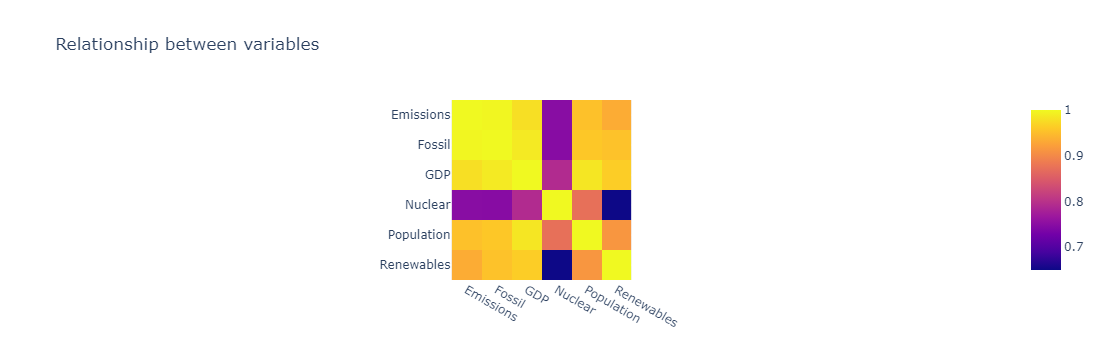

In [59]:
fig=px.imshow(df_source2_corr, title='Relationship between variables', labels=dict(x='', y=''))
fig.show()

#### CO2 Emissions are highly correlated with Fossil energy production, and GDP. Fossil energy production is highly correlated with GDP and population. 

## Scatterplots

### Group by country and source and filter on column 2021

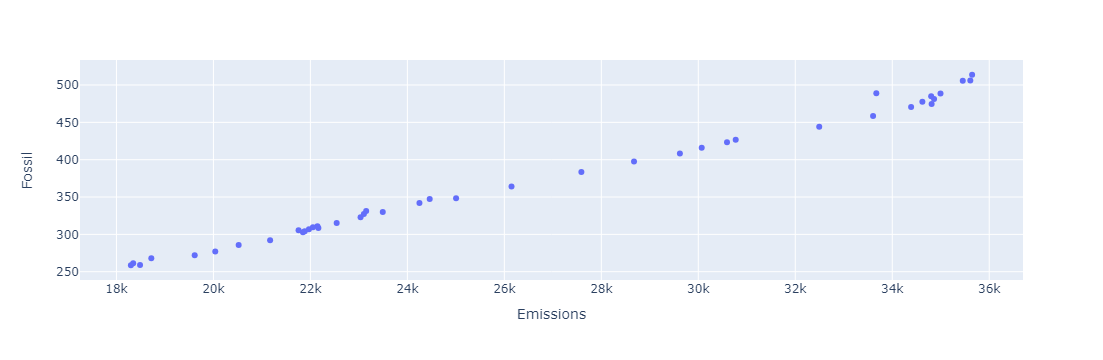

In [92]:
fig=px.scatter(df_source2,x='Emissions', y='Fossil',labels=dict(x='Country'))
fig.show()

#### This is the strongest correlation. We can infer that CO2 Emissions are highly explained by Fossil energy production.

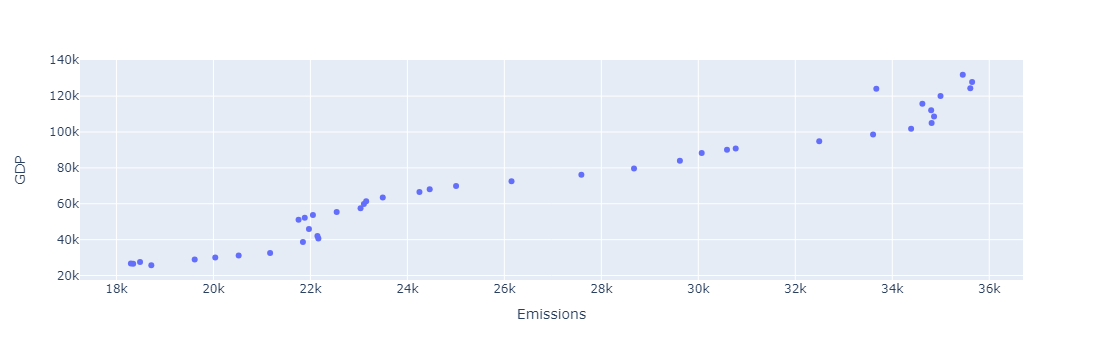

In [93]:
fig=px.scatter(df_source2,x='Emissions', y='GDP',labels=dict(x='Country'))
fig.show()

#### Almost linear. The highest the GDP the most emissions of CO2.

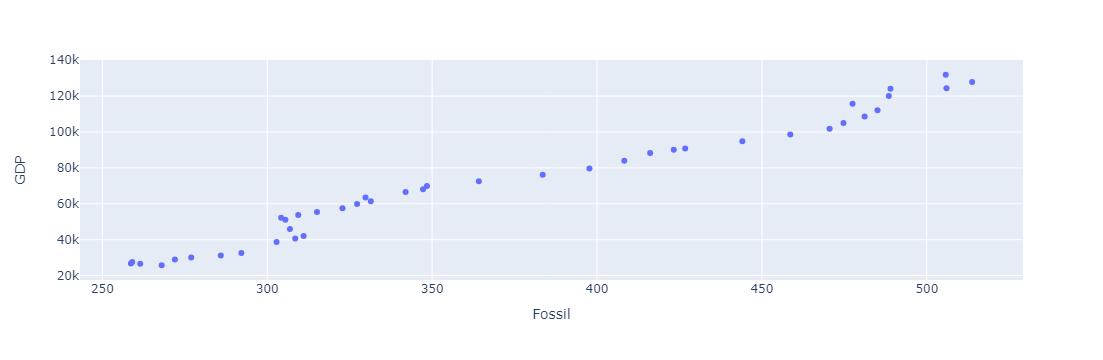

In [94]:
fig=px.scatter(df_source2,x='Fossil', y='GDP',labels=dict(x='Country'))
fig.show()

#### Almost linear. The highest the GDP the most Fossil energy production is required.

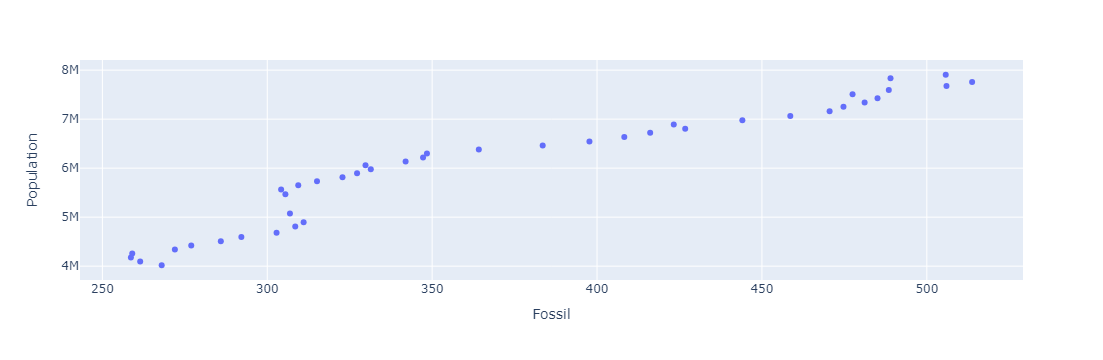

In [95]:
fig=px.scatter(df_source2,x='Fossil', y='Population',labels=dict(x='Country'))
fig.show()

#### Almost linear. Most populated countries have highest fossil energy production.

## Pair plot

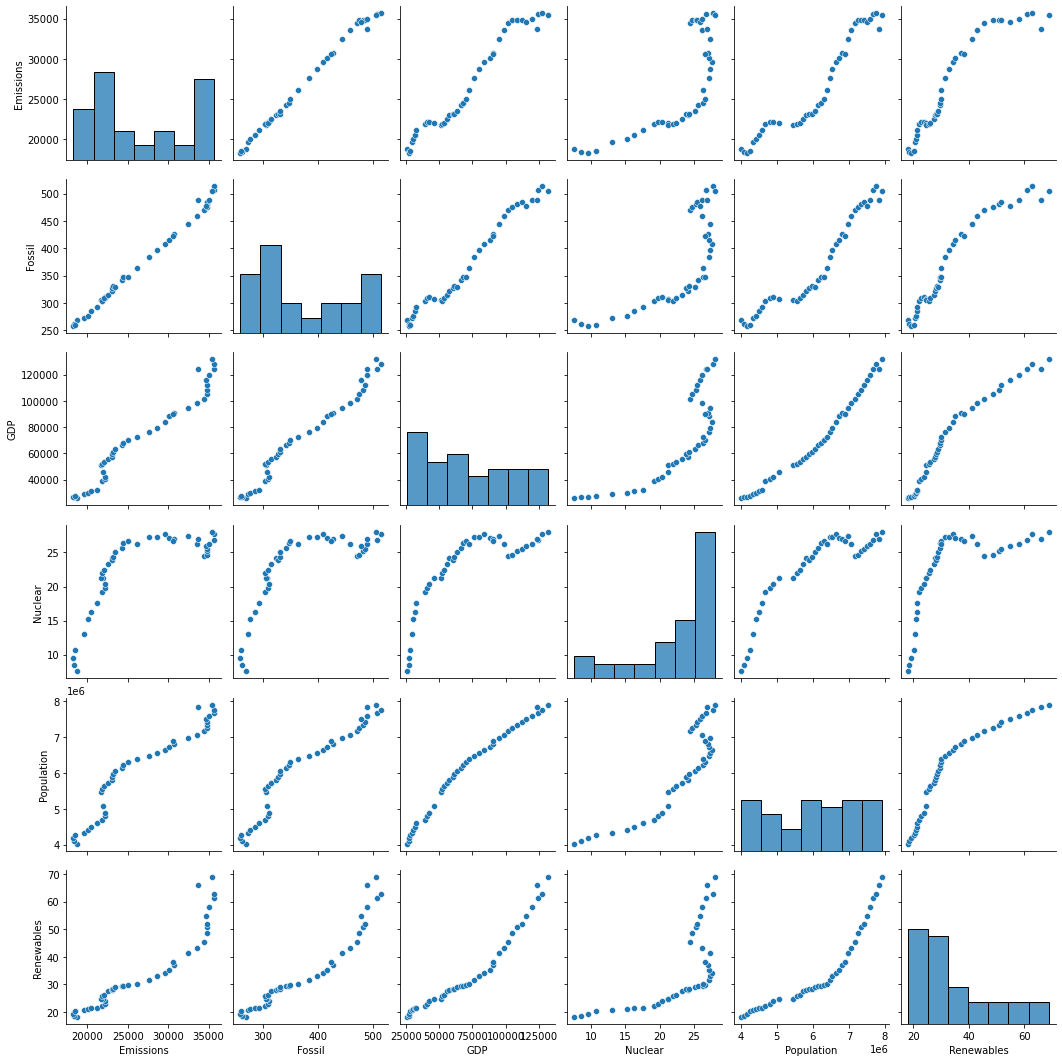

In [97]:
graph=sns.pairplot(df_source2)

#### The relationships between vairables was expected, given the conclussions drwan fro the heatmap. Nuclear energy production is the least related to the other variables, however, I am curious about the histogram, it seems that the most of the countries that produce nuclear energy are skewed to the right, which means that they tend to produce a lot of energy from this source, rather than what I was expecting, further analysis will be conducted to determine if this behavior has changed in the last years.

## Catplot

### Group by Category and Source

In [103]:
df_category=df.groupby(['Category','Source']).sum().reset_index()
df_category.drop(['Country','Subcategory','OECD','OPEC'],axis=1,inplace=True)
df_category.head()

,Category,Source,1980,1981,1982,1983,1984,1985,1986,1987,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CO2 Emisions (MMtonnes),Emissions,18719.162261,18345.182642,18298.316561,18486.865269,19614.015519,20038.501422,20520.667342,21169.271866,...,34388.892900,34812.109752,34862.271370,34802.428636,34621.385743,34995.271466,35609.756950,35646.844847,33671.579763,35454.366507
1,Energy Production (quad Btu),Fossil,267.989858,261.474036,258.653665,259.059496,271.992208,276.951957,285.922477,292.143889,...,470.518050,474.725405,481.137053,485.053803,477.478226,488.471021,505.957941,513.729039,488.993140,505.733155
2,Energy Production (quad Btu),Nuclear,7.575700,8.527153,9.513565,10.726269,13.004801,15.308216,16.259214,17.657473,...,24.496509,24.654789,25.248713,25.515348,25.919075,26.237027,26.784081,27.773124,26.968381,28.030879
3,Energy Production (quad Btu),Renewables,18.221752,18.605725,19.169708,20.183472,20.733806,20.964342,21.432927,21.480387,...,45.345767,48.658424,50.778974,51.754730,54.837564,58.011539,61.122102,62.676331,66.023940,68.732851
4,GDP (Billion USD),GDP,25740.503737,26632.008323,26782.890504,27550.579161,28963.871975,30093.051168,31159.220789,32500.920250,...,101783.678869,105081.506732,108637.273151,112158.173828,115755.229591,120075.147129,124431.445356,127940.738702,124078.267691,131913.392502


### Filter dataframe on Category='Energy Production (quad Btu)

In [124]:
df_energy=df_category.loc[df_category.Category=='Energy Production (quad Btu)']
df_energy.head()

,Category,Source,1980,1981,1982,1983,1984,1985,1986,1987,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,Energy Production (quad Btu),Fossil,267.989858,261.474036,258.653665,259.059496,271.992208,276.951957,285.922477,292.143889,...,470.518050,474.725405,481.137053,485.053803,477.478226,488.471021,505.957941,513.729039,488.993140,505.733155
2,Energy Production (quad Btu),Nuclear,7.575700,8.527153,9.513565,10.726269,13.004801,15.308216,16.259214,17.657473,...,24.496509,24.654789,25.248713,25.515348,25.919075,26.237027,26.784081,27.773124,26.968381,28.030879
3,Energy Production (quad Btu),Renewables,18.221752,18.605725,19.169708,20.183472,20.733806,20.964342,21.432927,21.480387,...,45.345767,48.658424,50.778974,51.754730,54.837564,58.011539,61.122102,62.676331,66.023940,68.732851


### Transpose dataframe

In [125]:
df_energy=df_energy.T.reset_index()
df_energy.head()

,index,1,2,3
0,Category,Energy Production (quad Btu),Energy Production (quad Btu),Energy Production (quad Btu)
1,Source,Fossil,Nuclear,Renewables
2,1980,267.989858,7.5757,18.221752
3,1981,261.474036,8.527153,18.605725
4,1982,258.653665,9.513565,19.169708


### Set row as header and drop rows

In [126]:
df_energy.columns=df_energy.iloc[1]
df_energy=df_energy.drop(df_energy.index[0])
df_energy=df_energy.drop(df_energy.index[0])
df_energy.head()

1,Source,Fossil,Nuclear,Renewables
2,1980,267.989858,7.5757,18.221752
3,1981,261.474036,8.527153,18.605725
4,1982,258.653665,9.513565,19.169708
5,1983,259.059496,10.726269,20.183472
6,1984,271.992208,13.004801,20.733806


### Melt dataframe to show source and year

In [141]:
df_energy2=pd.melt(df_energy, id_vars='Source', value_vars=['Fossil','Nuclear','Renewables'])
df_energy2.head()

,Source,1,value
0,1980,Fossil,267.989858
1,1981,Fossil,261.474036
2,1982,Fossil,258.653665
3,1983,Fossil,259.059496
4,1984,Fossil,271.992208


### Rename columns

In [142]:
df_energy2.rename(columns={'Source':'Year',1:'Source','value':'Energy Production (quad Btu)'},inplace=True)
df_energy2.head()
                  

,Year,Source,Energy Production (quad Btu)
0,1980,Fossil,267.989858
1,1981,Fossil,261.474036
2,1982,Fossil,258.653665
3,1983,Fossil,259.059496
4,1984,Fossil,271.992208


### Catplot chart

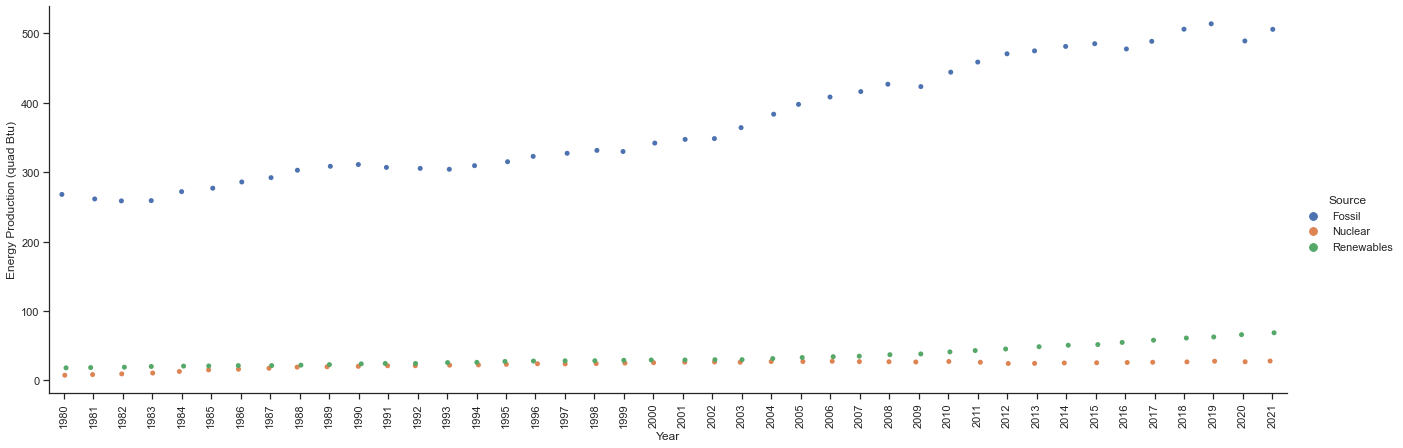

In [143]:
sns.set(style="ticks")
graph=sns.catplot(data=df_energy2,x='Year',y='Energy Production (quad Btu)', hue='Source', height=6, aspect=3)
graph.set_xticklabels(rotation=90)

#### Energy production from both fossil and renewable sources has increased in the last 20 years, while Nuclear energy seems to remain constant in that same period. Fossil energy production is almost ten times greater than renewable energy. 

## Questions

#### Is there a relationship between energy production and GDP? We can see by the scatterplot that the countries with the highest GDP have higher energy production than the others.
#### Is there a relationship between CO2 emissions and fossil energy production? This is the strongest correlation in the dataset. We can infer that CO2 Emissions are highly explained by Fossil energy production.
#### Is there a relationship between population and energy production? The most populated countries have a higher level of energy production.

## Hypothesis

#### H: Countries that have transition their energy production from fossil to renewable, decrease their CO2 Emissions. 